<a href="https://colab.research.google.com/github/anajikadam/Clinical-Trial-Search-Engine/blob/main/NER_Clinical_text_SpaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clinical NLP - Named Entity Recognition of Clinical & BioMedical Text

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Using SciSpacy

https://allenai.github.io/scispacy/

In [ ]:
# !pip install scispacy
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bionlp13cg_md-0.5.4.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz

In [ ]:
data_path = "/content/mtsamples.csv"
clinical_text_df = pd.read_csv(data_path)

print(clinical_text_df.columns)
clinical_text_df.head(5)



Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
Diseases_path = "https://raw.githubusercontent.com/amir-karami/COVID-19-Chemicals-Diseases/master/Github_Diseases_Freq_2020.csv"
Chemicals_path = "https://raw.githubusercontent.com/amir-karami/COVID-19-Chemicals-Diseases/master/Github_Chemical_Freq_2020.csv"
Diseases_df = pd.read_csv(Diseases_path)
Chemicals_df = pd.read_csv(Chemicals_path)


In [ ]:
Diseases_df.head()



,Term,Frequency
0,covid_19,7100
1,infection,1684
2,coronavirus_2019,1408
3,infected,1088
4,pneumonia,776


In [ ]:
Chemicals_df.head()

,Term,Frequency
0,lopinavir,318
1,ritonavir,293
2,oxygen,264
3,hydroxychloroquine,215
4,chloroquine,212


In [ ]:
!pip show spacy

Name: spacy
Version: 3.7.5
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: en-core-med7-lg, en-core-web-sm, en-ner-bc5cdr-md, en-ner-bionlp13cg-md, fastai, scispacy


In [ ]:
import scispacy
import spacy
# import en_ner_bionlp13cg_md

# Load the NLP model
# sci_nlp = spacy.load("en_ner_bionlp13cg_md")
sci_nlp = spacy.load("en_ner_bc5cdr_md") # en_ner_bc5cdr_md	84.28	DISEASE, CHEMICAL

/usr/local/lib/python3.10/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [ ]:
sci_nlp.component_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']

In [ ]:
sci_nlp.get_pipe("ner").labels

('CHEMICAL', 'DISEASE')

In [ ]:
Chemicals_df['Term'].values

array(['lopinavir', 'ritonavir', 'oxygen', ..., 'zn2', 'znal42',
       'zolmitriptan'], dtype=object)

In [ ]:
for i in Chemicals_df['Term'].values[:5]:
    docs = sci_nlp(i)
    for ent in docs.ents:
        print(ent.text, ent.label_)

ritonavir CHEMICAL
oxygen CHEMICAL
hydroxychloroquine CHEMICAL
chloroquine CHEMICAL


In [ ]:
for i in Diseases_df['Term'].values[:5]:
    print(i)
    docs = sci_nlp(i)
    for ent in docs.ents:
        print("Found:",ent.text, ent.label_)

covid_19
infection
Found: infection DISEASE
coronavirus_2019
infected
pneumonia
Found: pneumonia DISEASE


In [ ]:
x = clinical_text_df.iloc[0]['transcription']
x

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

In [ ]:
docs = sci_nlp(x)
for ent in docs.ents:
    print(ent.text, ent.label_)

complaint of allergies DISEASE
allergies DISEASE
Claritin CHEMICAL
Zyrtec CHEMICAL
asthma DISEASE
Tri-Cyclen CHEMICAL
throat DISEASE
Allergic rhinitis.,PLAN:,1 DISEASE
Zyrtec CHEMICAL
loratadine CHEMICAL
Nasonex CHEMICAL


In [ ]:
from spacy import displacy

docs = sci_nlp(x)
displacy.render(docs, style="ent", jupyter=True)

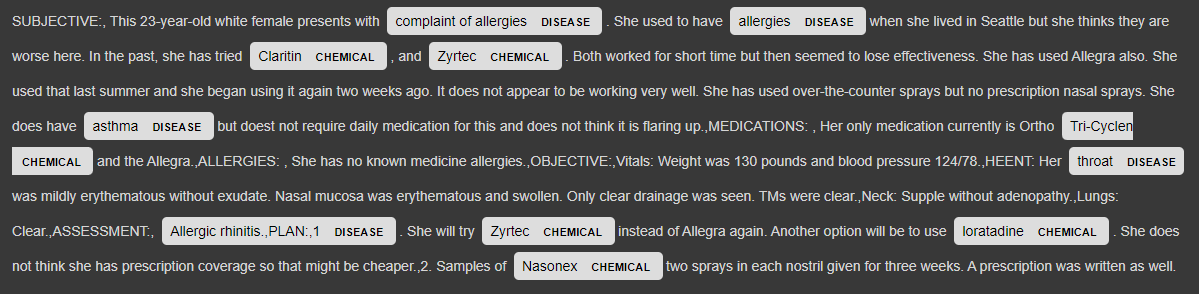

In [ ]:
def extract_deiseases(text):
    result = []
    if isinstance(text, str):
        docs = sci_nlp(text)
        result = [ent.text for ent in docs.ents if ent.label_ == 'DISEASE']
    return result

In [ ]:
clinical_text_df['disease'] = clinical_text_df['transcription'].apply(extract_deiseases)

In [ ]:
df = clinical_text_df[['description', 'medical_specialty', 'transcription','keywords', 'disease']]

In [ ]:
df.head()

,description,medical_specialty,transcription,keywords,disease
0,A 23-year-old white female presents with comp...,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...","[complaint of allergies, allergies, asthma, th..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...","[snoring, pains, knee pain, pain, ankle pain, ..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...","[overweight, weight loss, weight loss, weight ..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...","[atrial enlargement, pulmonary regurgitation]"
4,2-D Echocardiogram,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",[hyperdynamic left ventricular systolic functi...


In [ ]:
df = df.drop(df[df['transcription'].isna()].index)

In [ ]:

def get_commonest_diseases(category):
    # Filter data for the given category
    category_data = df[df['medical_specialty'] == category]['disease']

    if len(category_data)>0:
        disease_list = category_data.tolist()
        disease_list = [item for sublist in disease_list for item in sublist]
    else:
        disease_list = []
    return disease_list

# Example usage (assuming you have a DataFrame 'df' containing disease data)
common_surgery_diseases = get_commonest_diseases(' Surgery')
print(common_surgery_diseases)


['degenerative joint disease', 'degenerative joint disease', 'rash', 'tightness', 'postoperative pain', 'pain', 'postoperative edema', 'cataract', 'vision', 'Hallux limitus deformity', 'Hallux limitus deformity', 'bleeders', 'Gouty tophi', 'gout', 'tightness', 'hyperemia', 'pain', 'postoperative pain', 'Peripheral vascular disease.,POSTOPERATIVE DIAGNOSES,1', 'seropurulent', 'necrotic', 'opacity', 'decrease in visual acuity', 'opacity', 'hydrocephalus', 'fistula', 'fistula', 'intraventricular hemorrhage', 'Blood loss', 'conjunctival', 'conjunctival', 'conjunctival', 'Epiretinal', 'Epiretinal', 'epiretinal', 'edema', 'DVT', 'fracture', 'fracture', 'fracture', 'aortic stenosis', 'congestive heart failure symptoms', 'tachybrady arrhythmias', 'pectoris', 'pectoris', 'bipolar', 'congestive heart failure', 'tachybrady', 'conjunctival', 'vitreous hemorrhage', 'diabetic membranes emanating along the arcades', 'bleeding', 'Vitreous hemorrhage', 'retinal detachment', 'Vitreous hemorrhage', 'reti

In [ ]:
top_5_medical_specialty = df['medical_specialty'].value_counts().head(5).index
print(top_5_medical_specialty)

Index([' Surgery', ' Consult - History and Phy.',
       ' Cardiovascular / Pulmonary', ' Orthopedic', ' Radiology'],
      dtype='object', name='medical_specialty')


In [ ]:
# !pip install wordcloud
# Fxn to plot the disease

In [ ]:
from wordcloud import WordCloud

def plot_wordcloud(text):
  """Plots a wordcloud representation of the input text."""
  mywordcloud = WordCloud().generate(text)
  plt.imshow(mywordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

 Surgery


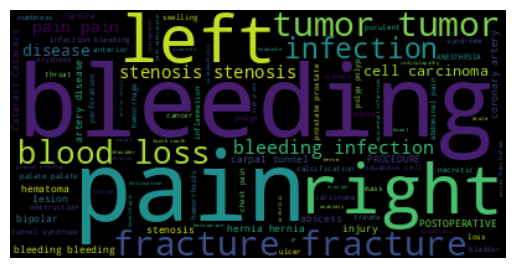


 Consult - History and Phy.


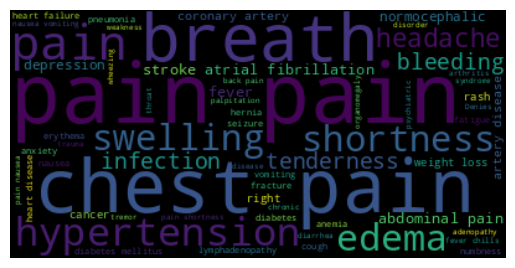


 Cardiovascular / Pulmonary


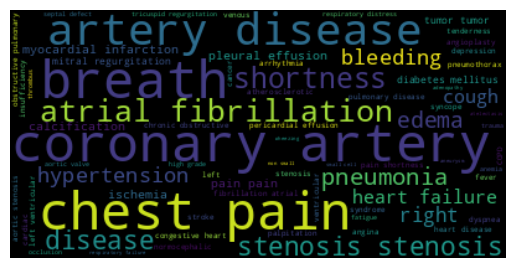


 Orthopedic


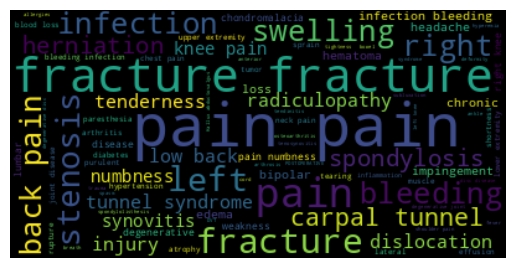


 Radiology


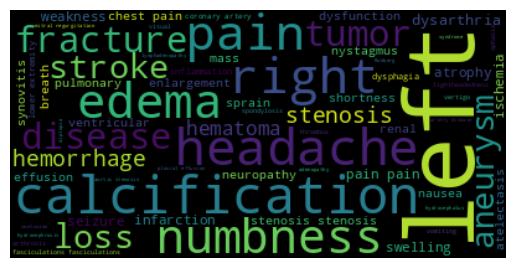

In [ ]:
for i in top_5_medical_specialty:
    print(i)
    common_diseases = get_commonest_diseases(i)
    #print(common_diseases)
    plot_wordcloud(' '.join(common_diseases))
    print("============="*10)
    print()

Above worldcloud shows what are the specific diseases more with repect to medical_specialty

# med7

https://github.com/kormilitzin/med7

In [ ]:
# !pip install https://huggingface.co/kormilitzin/en_core_med7_lg/resolve/main/en_core_med7_lg-any-py3-none-any.whl

In [ ]:
import spacy

med7 = spacy.load("en_core_med7_lg")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_med7_lg' (3.4.2.1) was trained with spaCy v3.4.2 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
med7.component_names

['tok2vec', 'ner']

In [ ]:
col_dict = {}
seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}

text = df.iloc[6]['transcription']
doc = med7(text)

spacy.displacy.render(doc, style='ent', jupyter=True, options=options)

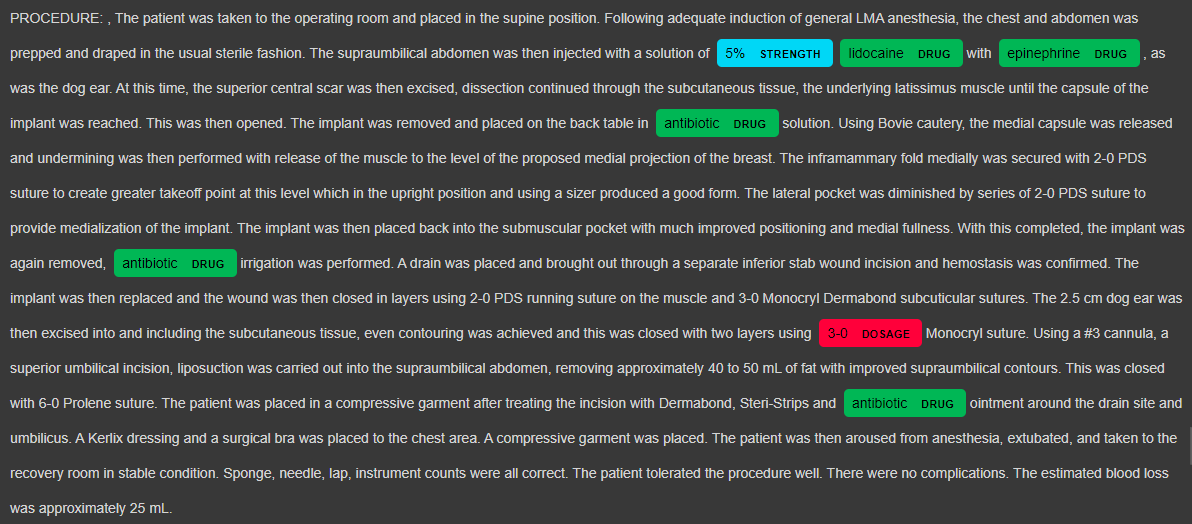

In [ ]:

# create distinct colours for labels
col_dict = {}
seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}

text = 'A patient was prescribed Magnesium hydroxide 400mg/5ml suspension PO of total 30ml bid for the next 5 days.'
doc = med7(text)

spacy.displacy.render(doc, style='ent', jupyter=True, options=options)

[(ent.text, ent.label_) for ent in doc.ents]

[('Magnesium hydroxide', 'DRUG'),
 ('400mg/5ml', 'DOSAGE'),
 ('suspension', 'FORM'),
 ('PO', 'ROUTE'),
 ('30ml', 'DOSAGE'),
 ('bid', 'FREQUENCY')]

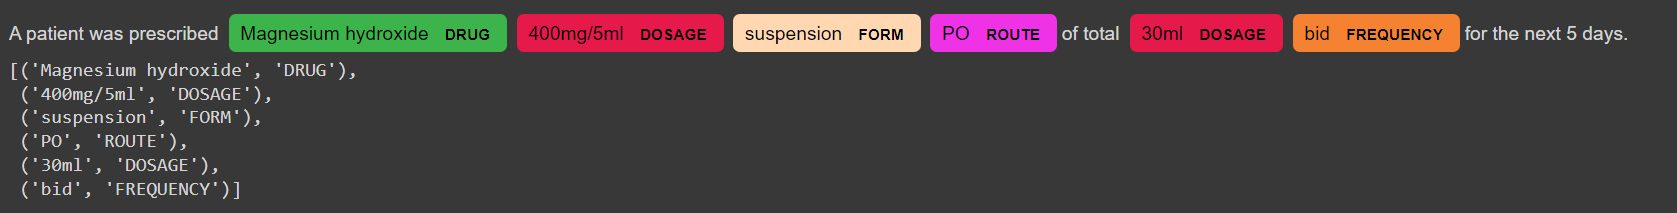

# Future plans

GLiNER: Generalist and Lightweight Model for Named Entity Recognition